2024-09-26 14:14:42,113 [INFO] Number of channels: 4
2024-09-26 14:14:42,114 [INFO] Preparing dataset samples...
Listing samples: 100%|██████████| 28/28 [00:00<00:00, 1003.54it/s]
2024-09-26 14:14:42,145 [INFO] Total samples in dataset: 868


Channel Data Statistics:
Channel 0: IC min=0.6993419528007507, IC max=0.7013699412345886
  Step 1: min=0.6994906663894653, max=0.7014170289039612
  Step 2: min=0.6995446085929871, max=0.7014071941375732
  Step 3: min=0.6995717883110046, max=0.7014039158821106
  Step 4: min=0.6995856761932373, max=0.7014020085334778
  Step 5: min=0.6995925307273865, max=0.7014011144638062
  Step 6: min=0.699596107006073, max=0.7014012932777405
  Step 7: min=0.6995983123779297, max=0.701402485370636
  Step 8: min=0.6996017098426819, max=0.7014061808586121
Channel 1: IC min=0.008512768894433975, IC max=0.008512768894433975
  Step 1: min=0.008512768894433975, max=0.008512768894433975
  Step 2: min=0.008512768894433975, max=0.008512768894433975
  Step 3: min=0.008512768894433975, max=0.008512768894433975
  Step 4: min=0.008512768894433975, max=0.008512768894433975
  Step 5: min=0.008512768894433975, max=0.008512768894433975
  Step 6: min=0.008512768894433975, max=0.008512768894433975
  Step 7: min=0.0085127

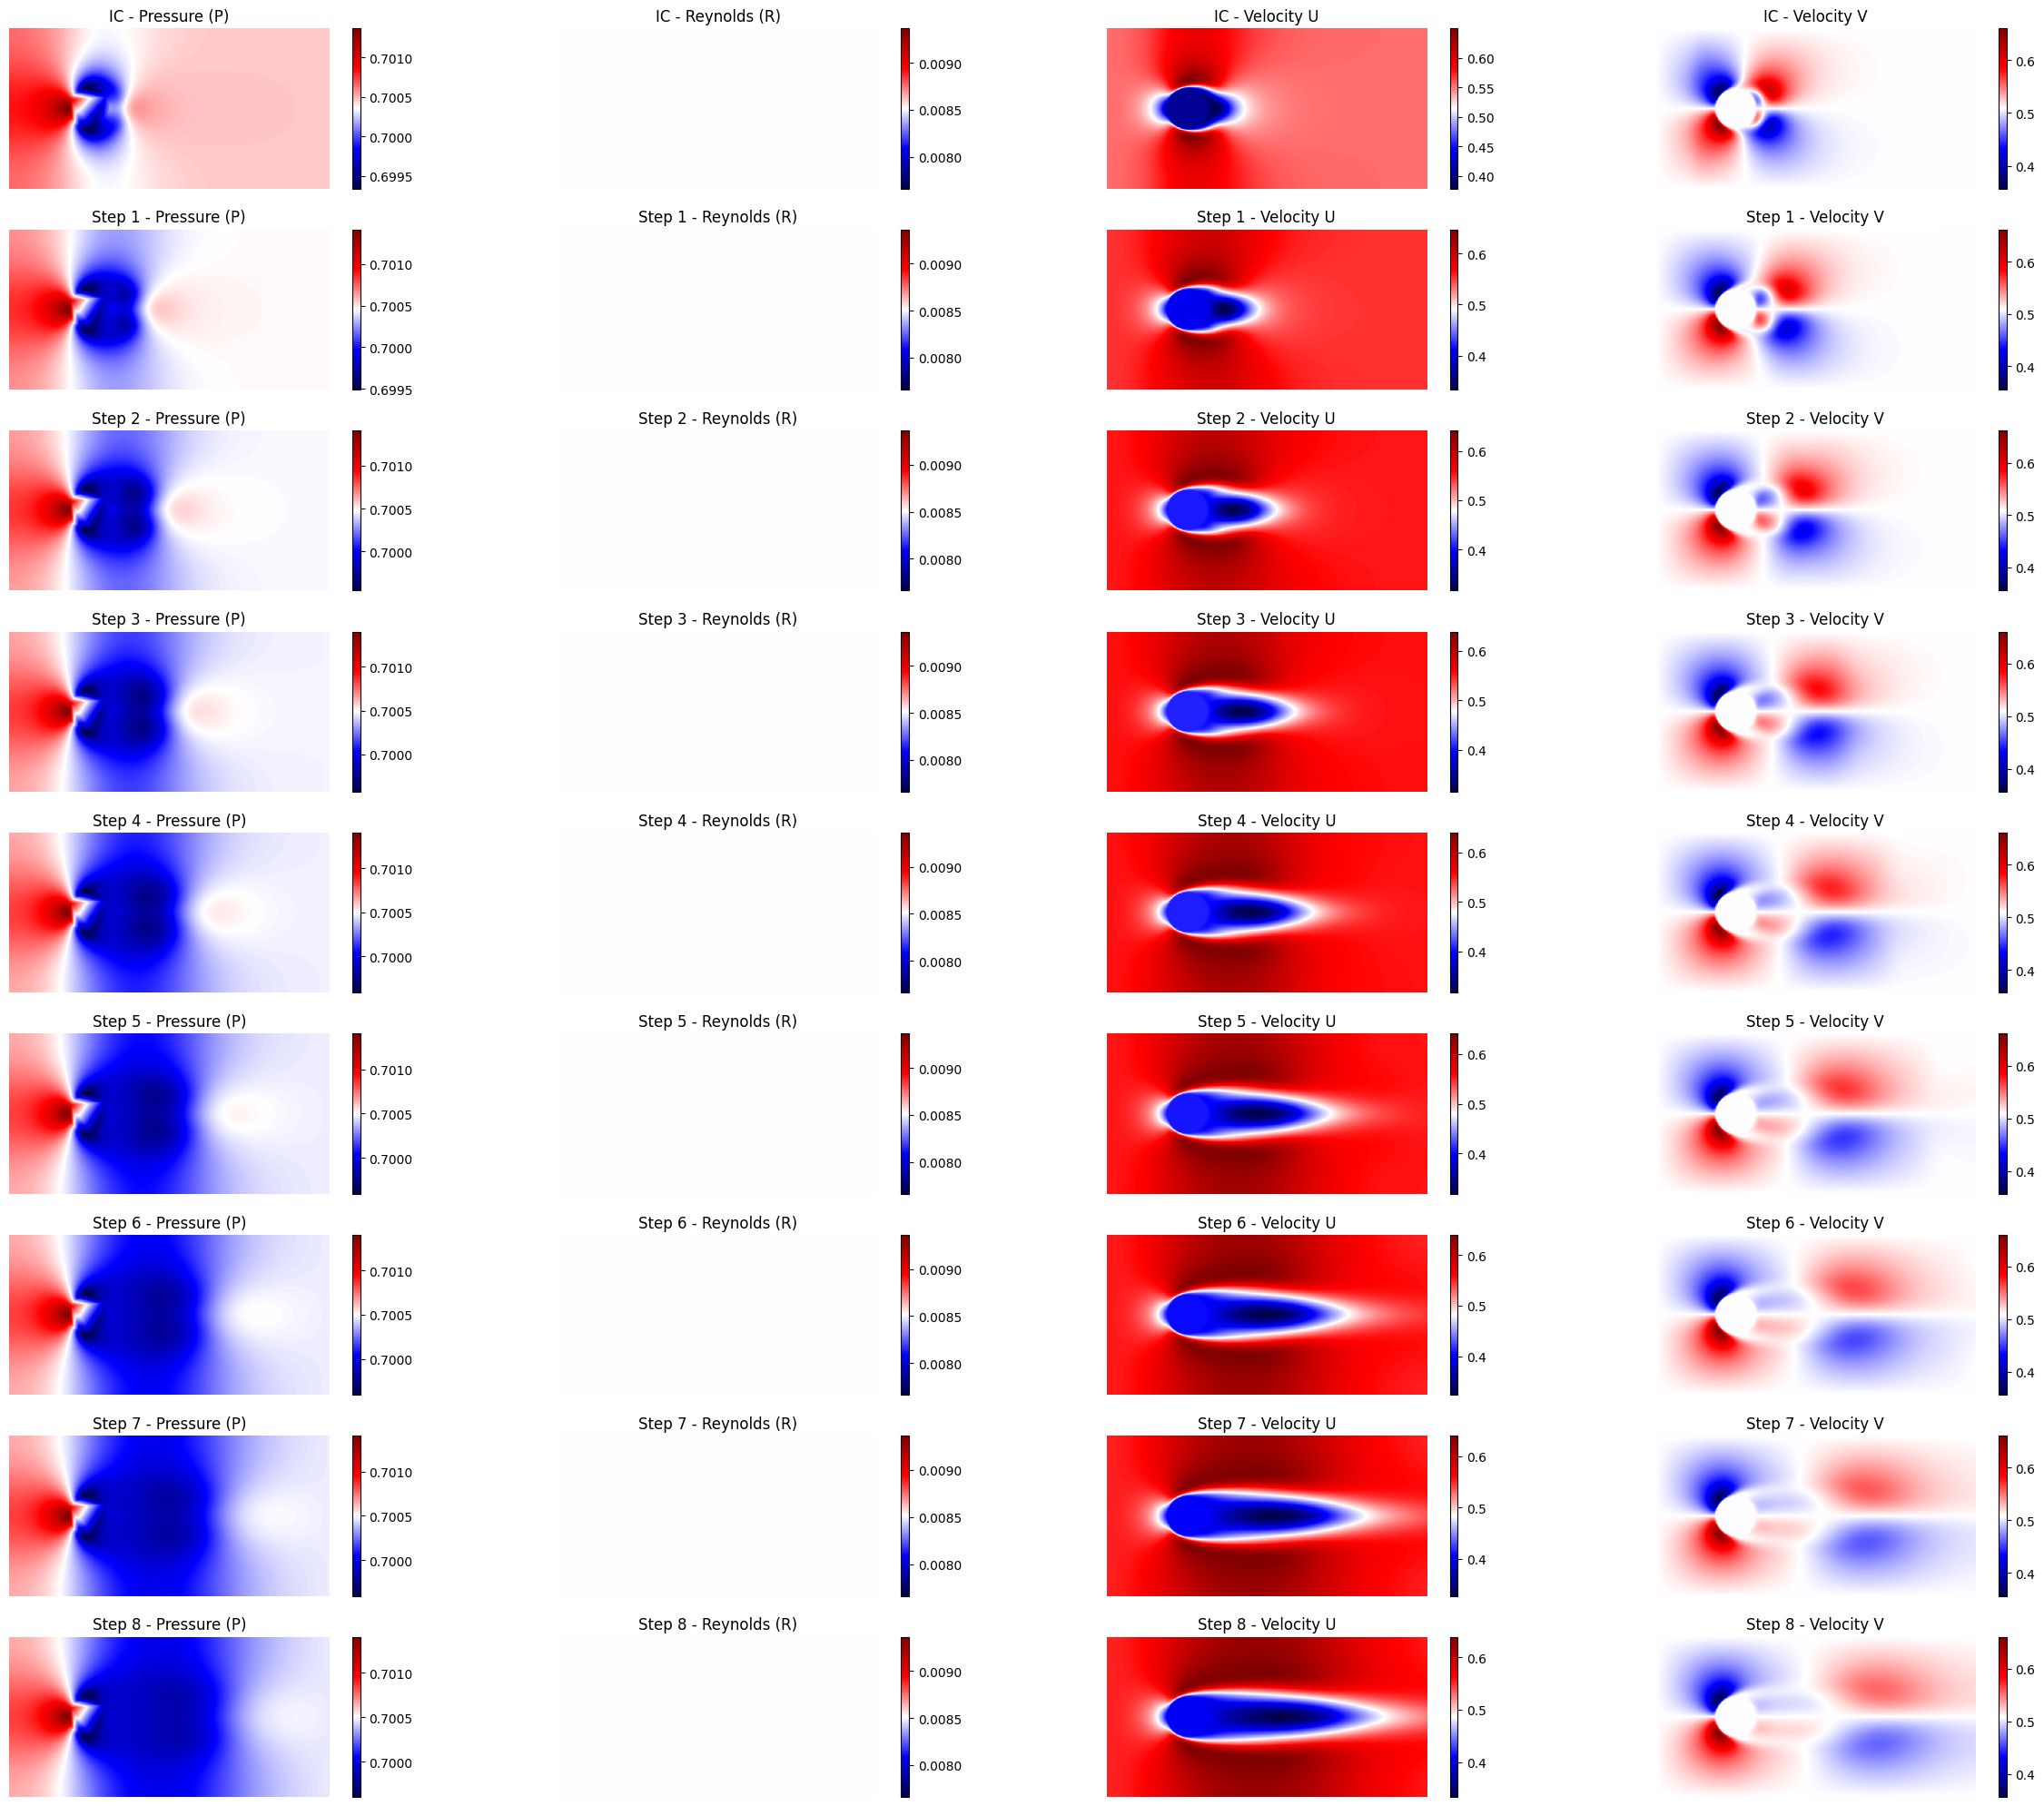

In [5]:
import sys
import os

# Add the root directory (PARCTorch) to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Now import the utilities
from data.dataset import (
    GenericPhysicsDataset,
    custom_collate_fn,
    visualize_channels,
)

from torch.utils.data import DataLoader
import logging

# Set up logging
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s"
)

# Example configuration for HMX dataset
data_dir_train = "/project/vil_baek/data/physics/PARCTorch/NavierStokes/train"  # Replace with your actual train directory path
data_dir_test = "/project/vil_baek/data/physics/PARCTorch/NavierStokes/test"  # Replace with your actual test directory path
future_steps = 8
# Path to the min_max.json file
min_max_path = os.path.join("..", "data", "ns_min_max.json")  # Correct path
batch_size = 8

# Initialize the dataset
train_dataset = GenericPhysicsDataset(
    data_dirs=[data_dir_train],
    future_steps=future_steps,
    min_max_path=min_max_path,
)

# Create DataLoader for training dataset
train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
    collate_fn=custom_collate_fn,
)

# Fetch a batch and visualize
for batch in train_loader:
    ic, t0, t1, target = batch
    channel_names = [
        "Pressure (P)",
        "Reynolds (R)",
        "Velocity U",
        "Velocity V",
    ]
    custom_cmaps = ["seismic", "seismic", "seismic", "seismic"]

    visualize_channels(
        ic,
        t0,
        t1,
        target,
        channel_names=channel_names,
        channel_cmaps=custom_cmaps,
    )
    break  # Visualize one batch for now